In [1]:
import datetime
import os

import pandas as pd
import seaborn as sns

In [2]:
#set variables
csv_location = './'
plate = 'CP228'
foci_filename = 'BarcodePreprocessing_Foci.csv'
#Merge Foci csvs
#Run if csvs are in separate folders
folderlist = os.listdir(csv_location)
df_dict={}
count = 0
print(count, datetime.datetime.ctime(datetime.datetime.now()))
for eachfolder in folderlist:
    if os.path.isfile(os.path.join(eachfolder, foci_filename)):
        try:
            df_dict[eachfolder]=pd.read_csv(os.path.join(csv_location, eachfolder, foci_filename),index_col=False,usecols=["Barcode_MatchedTo_Score", "Barcode_BarcodeCalled","Barcode_MatchedTo_ID"])
        except:
            pass
        count+=1
        if count % 100 == 0:
            print(count, datetime.datetime.ctime(datetime.datetime.now()))
print(count, datetime.datetime.ctime(datetime.datetime.now()))
df_foci = pd.concat(df_dict, ignore_index=True)
print('done concatenating at', datetime.datetime.ctime(datetime.datetime.now()))

0 Tue May  4 12:34:46 2021
100 Tue May  4 12:36:36 2021
100 Tue May  4 12:36:36 2021
done concatenating at Tue May  4 12:36:36 2021


In [3]:
print ("For plate ", plate)
print ("%Barcodes with match > .9:")
print (sum(df_foci['Barcode_MatchedTo_Score']>0.9)*100.0/sum(df_foci['Barcode_MatchedTo_Score']>0))
print ("%Barcodes with perfect match:")
print (sum(df_foci['Barcode_MatchedTo_Score']==1)*100.0/sum(df_foci['Barcode_MatchedTo_Score']>0))
print ("Number of perfect barcodes:")
print (sum(df_foci['Barcode_MatchedTo_Score']==1))
df_foci['PerfectReads']=df_foci['Barcode_MatchedTo_ID'].where(df_foci['Barcode_MatchedTo_Score']==1,0,axis='index')

For plate  CP228
%Barcodes with match > .9:
89.84906466449725
%Barcodes with perfect match:
89.84906466449725
Number of perfect barcodes:
1976931


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CP228')

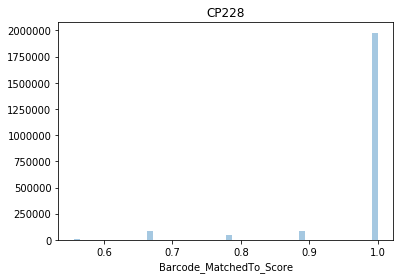

In [4]:
sns.distplot(df_foci['Barcode_MatchedTo_Score'], kde=False).set_title(plate)

In [5]:
df_foci['Barcode_BarcodeCalled'].value_counts().head(20)

GTGCTAAGA    138432
GCAGTGCTA    108744
CTGTGGAGT     84248
CAGGGGATA     75454
TCGGGTGCC     54026
AGAGTTAGA     52633
GATGGATCC     49765
ACCAACGGA     43344
TAGCACTCA     42918
GATCAACAT     39459
GAAACACTT     39312
ACCACACGG     37429
AACGACCAC     36453
CCGGGTTCT     36376
AAAGTCGAA     36115
GAAAACACT     35271
TATCTCAAA     32410
CCTCTACAG     32146
CATTAGCTG     29498
GGAGATCAG     28991
Name: Barcode_BarcodeCalled, dtype: int64

In [6]:
BarcodeCat = df_foci['Barcode_BarcodeCalled'].str.cat()
countG = BarcodeCat.count('G')
countT = BarcodeCat.count('T')
countA = BarcodeCat.count('A')
countC = BarcodeCat.count('C')
print ("Frequency of A is " + str(float(countA)/float((len(BarcodeCat)))))
print ("Frequency of C is " + str(float(countC)/float((len(BarcodeCat)))))
print ("Frequency of G is " + str(float(countG)/float((len(BarcodeCat)))))
print ("Frequency of T is " + str(float(countT)/float((len(BarcodeCat)))))

Frequency of A is 0.28129217897520115
Frequency of C is 0.2304316824323369
Frequency of G is 0.2708285612134213
Frequency of T is 0.21744757737904064
